In [3]:
!pip install --upgrade datascience

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [4]:
# Load needed python resources
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import scipy as sp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  after removing the cwd from sys.path.


In [5]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/Colab Notebooks/data

/content/drive/MyDrive/Colab Notebooks/data


# Introduction
This dataset holds information regarding the average male and female heights in every country. I was initially interested by this dataset because I thought it could reveal some interesting trends about human evolution. Given different environmental and dietary factors, how have different civilizations evolved regarding height? The variables that are measured in the dataset are the country's name, thier coordinates, and the average female and male height in cm. The 191 element dataset is read in with pandas below.

In [7]:
# For this data set, it may be useful to have latitude and longitude as quantative representations of a traditionally categorical idea of location. 
# This way we can make predictions based off of location.
heights = pd.DataFrame(pd.read_csv('Height of Male and Female by Country 2022.csv'))
countries = pd.DataFrame(pd.read_csv('latlong.csv'))

heights = (
    heights.merge(countries)
    .drop(columns=['Rank', 'Female Height in Ft', 'Male Height in Ft', 'Abrev'])
    .rename(columns={'2020':'pop'}))

heights.head()

,Country Name,Male Height in Cm,Female Height in Cm,lat,long
0,Netherlands,183.78,170.36,52.132633,5.291266
1,Montenegro,183.30,169.96,42.708678,19.374390
2,Estonia,182.79,168.66,58.595272,25.013607
3,Bosnia and Herzegovina,182.47,167.47,43.915886,17.679076
4,Iceland,182.10,168.91,64.963051,-19.020835


# Research Question
One thing I wanted to explore in my dataset was the difference between male and female heights. This led to my reasearch question 'How much taller are males compared to females?'. To answer this, I need to draw bootstrap samples of identical size with replacement of a representative sample.

A problem that arises here is that my dataset only takes in an average for each country, rather than individual cases. This is not what we want because some populations will now be over/under-represented if we treat it as a sample. Since our sample is not representative of the population, we can not treat this method as valid. However, for the sake of showing the process of bootstrapping, I will draw 10000 samples of n equal to our original dataset length with replacement and find the difference in means. 

Assume that the dataset is representative of the population for the sake of the project.

In [8]:
# Boot strapped sample heights
maleHeights = []
femaleHeights = []
i = 0
while i < 10000:
  maleHeights.append(heights['Male Height in Cm'].sample(n=len(heights), replace=True).mean())
  femaleHeights.append(heights['Female Height in Cm'].sample(n=len(heights), replace=True).mean())
  i += 1
  
maleHeights = np.array(maleHeights)
femaleHeights = np.array(femaleHeights)
differences = maleHeights - femaleHeights
differences

array([ 12.19020942,  12.5839267 ,  12.59984293, ...,  12.62057592,
        12.1386911 ,  12.49560209])

# Confidence Interval
Using this data about differences in average male and female heights, we can construct a confidence interval that will describe a range of values where we expect the true mean difference in height to be. To construct the confidence interval, we choose a confidence-level(95% chosen here) and measure the corresponding percentiles. 

(array([ 0.00162045,  0.01296362,  0.09749721,  0.33705406,  0.69895505,
         0.8080655 ,  0.51476365,  0.186352  ,  0.03889085,  0.00459128]),
 array([ 10.20418848,  10.5744555 ,  10.94472251,  11.31498953,
         11.68525654,  12.05552356,  12.42579058,  12.79605759,
         13.16632461,  13.53659162,  13.90685864]),
 <a list of 10 Patch objects>)

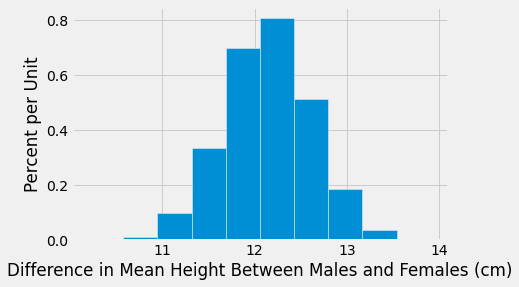

In [9]:
matplotlib.pyplot.xlabel('Difference in Mean Height Between Males and Females (cm)')
matplotlib.pyplot.ylabel('Percent per Unit')
plots.hist(differences, density=True)

In [10]:
print('We are 95% confident that the true difference in mean height of male and females is between ' + str(np.percentile(differences, 2.5)) + ' and ' + str(np.percentile(differences, 97.5)) +' cm.')

We are 95% confident that the true difference in mean height of male and females is between 11.2153913613 and 13.0674882199 cm.


**FOR PDF**: between range (11.227104712041935, 13.075613874345395)

# Exploratory Data Analysis
Next, I am going to start to look at global trends of average heights. In order to gain some intuition for what trends may exist, I first chose to look at simple 2D scatter plots relating latitude and longitude to the average heights. A scatter plot of latitude and average height did not reveal much, but a relationshiup of longitude and average height tells a different story. 

Here we can observe a unique trend where each major continent appears spaced out and in a vertical line. This is interesting because it shows you just how differently humans can develop even when in the same position on earth in terms of longitude. Generally, the trend appears to describe decreasing male height as we move from the west to the east. The most diverse region is at longitude 0 degrees. This shows a wide range of heights as it runs through both Europe and Africa where average height will vary greatly between the two.

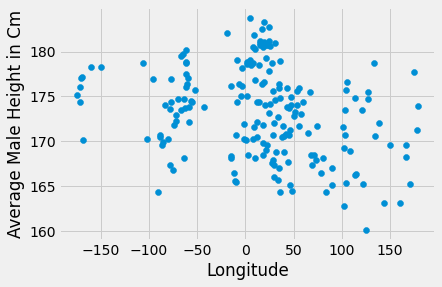

In [11]:
fig = plots.figure()
ax = fig.add_subplot()
ax.scatter(heights['long'], heights['Male Height in Cm'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Average Male Height in Cm')
plots.show()

# Further Insight and Intuition for k-nearest Classifier
In this section, I decided that I wanted to see both latitude and longitude in reltaionship to average height in order to reveal more about these lines or 'groups' of countries. To do this, we can use matplotlib to create a 3-dimensional scatterplot. You will notice two different types of markers representing the data points. These markers indicate gender with blue being male and red being female. This plot also gives us intuition for our nearest neighbor classifier which we will be doing later in this 3D space. 

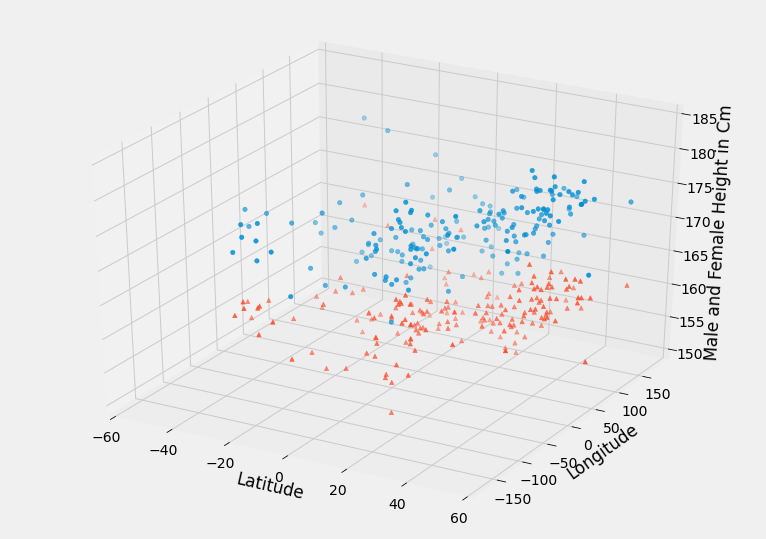

In [12]:
# What about latitude and longitude in relation to height?
fig = plots.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
points = heights.iloc[:, [3,4,1]]

for m, zlow, zhigh in [('o', -180, 180)]:
    xs = heights['lat']
    ys = heights['long']
    zs = heights['Male Height in Cm']
    ax.scatter(xs, ys, zs, marker=m)

for m, zlow, zhigh in [('^', -180, 180)]:
    xs = heights['lat']
    ys = heights['long']
    zs = heights['Female Height in Cm']
    ax.scatter(xs, ys, zs, marker=m)


ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Male and Female Height in Cm')

plots.xlim(-60, 60)
plots.show()

# Classification
In this final section, I use our nearest-neighbor method of classification to make a system that will be able to predict a person's gender based on birthplace and height. To carry out this proccess, we must find the closest point (or k-closest points) to our data which we would like to guess about. If we are using more than one k to classify our data, we sort all of the distances to our point in ascending order and take the mode gender of the first k entrys. In this case, I just used the first nearest neighbor, but this code could be easily changed to do more than one. The distances from our point to the others are found using sqrt(x^2+y^2+z^2) and then sorted to find the smallest the distance. Our new predicted gender is that of the smallest-distance point. I believe this method of classification is valid because we can clearly observe two 'layers' of points in the 3D space seperated by gender. By using the nearest-neighbor classifier, we not only capture the trends of gender, but also the trends of location that effect height.

This classifier could be further tested on for accuracy to determine whether 1 is a good k-value, and it could be done with a dataset of individual people's gender, height, and birthplace.

In [14]:
# Finds the nearest point to our testing point
def findClosestMale(point):
  heights['distances'] = ((point[0]-heights['lat'])**2 + (point[1]-heights['long'])**2 + (point[2]-heights['Male Height in Cm'])**2)**(1/2)
  index = heights[np.min(heights['distances']) == heights['distances']].index
  return [heights.iloc[index].drop(columns=['Female Height in Cm', 'distances']), np.min(heights['distances'])]

def findClosestFemale(point):
  heights['distances'] = ((point[0]-heights['lat'])**2 + (point[1]-heights['long'])**2 + (point[2]-heights['Female Height in Cm'])**2)**(1/2)
  index = heights[np.min(heights['distances']) == heights['distances']].index
  return [heights.iloc[index].drop(columns=['Male Height in Cm', 'distances']), np.min(heights['distances'])]

def predictGender(latitude, longitude, height):
  point = [latitude, longitude, height]
  if float(findClosestMale(point)[1]) < float(findClosestFemale(point)[1]):
    return 'Male'
  else:
    return 'Female'

# Predict Hilary Clinton
predictGender(41.9853096, -87.6703345, 167)

'Female'

# Conclusion
In this dataset, I have used statistical methods to describe a range where we can confidently expect the difference between male and female heights to fall (ignoring discrepencies). Then, we analyzed global trends to gain intuition about how heights vary and relate to each other across the world. We did this by constructing a quick 2D scatterplot to first reveal any obvious trends, and then we followed with a 3D plot of latitude and longitude to gain a deeper understanding of the behavior of height around the world. Finally, with intuition from our 3D plot, we constructed a system that finds the nearest average height and location (latitude and longitude in a 3D space) to predict a gender of a given entry. These methods describe and reveal trends and behavior of worldwide heights in men and women.